In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv('power consumption.csv')
df

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3
0,01-01-2017 00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,01-01-2017 00:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,01-01-2017 00:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,01-01-2017 00:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,01-01-2017 00:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


# Basic checks 

In [3]:
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3
0,01-01-2017 00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,01-01-2017 00:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,01-01-2017 00:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,01-01-2017 00:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,01-01-2017 00:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [4]:
df.tail()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504
52415,12/30/2017 23:50,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DateTime               52416 non-null  object 
 1   Temperature            52416 non-null  float64
 2   Humidity               52416 non-null  float64
 3   Wind Speed             52416 non-null  float64
 4   general diffuse flows  52416 non-null  float64
 5   diffuse flows          52416 non-null  float64
 6   Zone 1                 52416 non-null  float64
 7   Zone 2                 52416 non-null  float64
 8   Zone 3                 52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [6]:
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [7]:
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1', 'Zone 2  ',
       'Zone 3  '],
      dtype='object')

In [8]:
df.dtypes

DateTime                  object
Temperature              float64
Humidity                 float64
Wind Speed               float64
general diffuse flows    float64
diffuse flows            float64
Zone 1                   float64
Zone 2                   float64
Zone 3                   float64
dtype: object

In [9]:
df.Temperature.unique()

array([6.559, 6.414, 6.313, ..., 6.947, 6.758, 6.58 ])

In [10]:
df.Temperature.value_counts()

15.18    58
20.76    56
19.79    55
20.74    52
20.83    51
         ..
33.49     1
33.35     1
33.22     1
30.68     1
6.58      1
Name: Temperature, Length: 3437, dtype: int64

In [11]:
print(df.select_dtypes(include="object").columns)

Index(['DateTime'], dtype='object')


# EDA

In [12]:
## Univariate Analysis
!pip install sweetviz#installing sweetviz library`


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: 'sweetviz#installing': Expected end or semicolon (after name and no valid version specifier)
    sweetviz#installing
            ^


In [13]:
import sweetviz as sv#importing sweetviz library 
my_report = sv.analyze(df)#syntax to use sweetviz
my_report.show_html()#Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<Axes: xlabel='Temperature', ylabel='Count'>

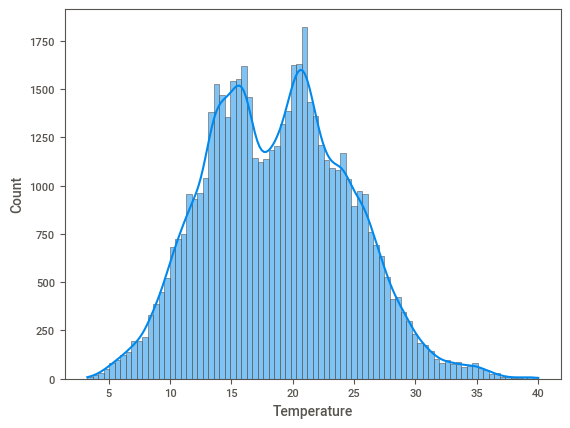

In [14]:
sns.histplot(df.Temperature,kde=True)

<Axes: xlabel='Humidity', ylabel='Count'>

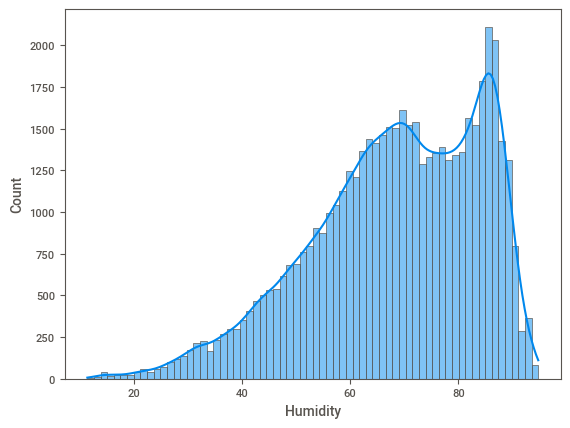

In [15]:
sns.histplot(df.Humidity,kde=True)

# Data Preprocessing

In [16]:
df.isnull().sum()

DateTime                 0
Temperature              0
Humidity                 0
Wind Speed               0
general diffuse flows    0
diffuse flows            0
Zone 1                   0
Zone 2                   0
Zone 3                   0
dtype: int64

In [17]:
## Removing constant features
df.drop(['DateTime'], axis="columns", inplace=True) 

In [18]:
df.rename(columns={'Zone 1': 'Zone1'}, inplace=True)
df.rename(columns={'Wind Speed': 'WS'}, inplace=True)
df.rename(columns={'general diffuse flows': 'GDF'}, inplace=True)
df.rename(columns={'diffuse flows': 'DF'}, inplace=True)

In [19]:
df

,Temperature,Humidity,WS,GDF,DF,Zone1,Zone 2,Zone 3
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [20]:
df.corr()

,Temperature,Humidity,WS,GDF,DF,Zone1,Zone 2,Zone 3
Temperature,1.000000,-0.460243,0.477109,0.460294,0.196522,0.440221,0.382428,0.489527
Humidity,-0.460243,1.000000,-0.135853,-0.468138,-0.256886,-0.287421,-0.294961,-0.233022
WS,0.477109,-0.135853,1.000000,0.133733,-0.000972,0.167444,0.146413,0.278641
GDF,0.460294,-0.468138,0.133733,1.000000,0.564718,0.187965,0.157223,0.063376
DF,0.196522,-0.256886,-0.000972,0.564718,1.000000,0.080274,0.044667,-0.038506
Zone1,0.440221,-0.287421,0.167444,0.187965,0.080274,1.000000,0.834519,0.750733
Zone 2,0.382428,-0.294961,0.146413,0.157223,0.044667,0.834519,1.000000,0.570932
Zone 3,0.489527,-0.233022,0.278641,0.063376,-0.038506,0.750733,0.570932,1.000000


<Axes: >

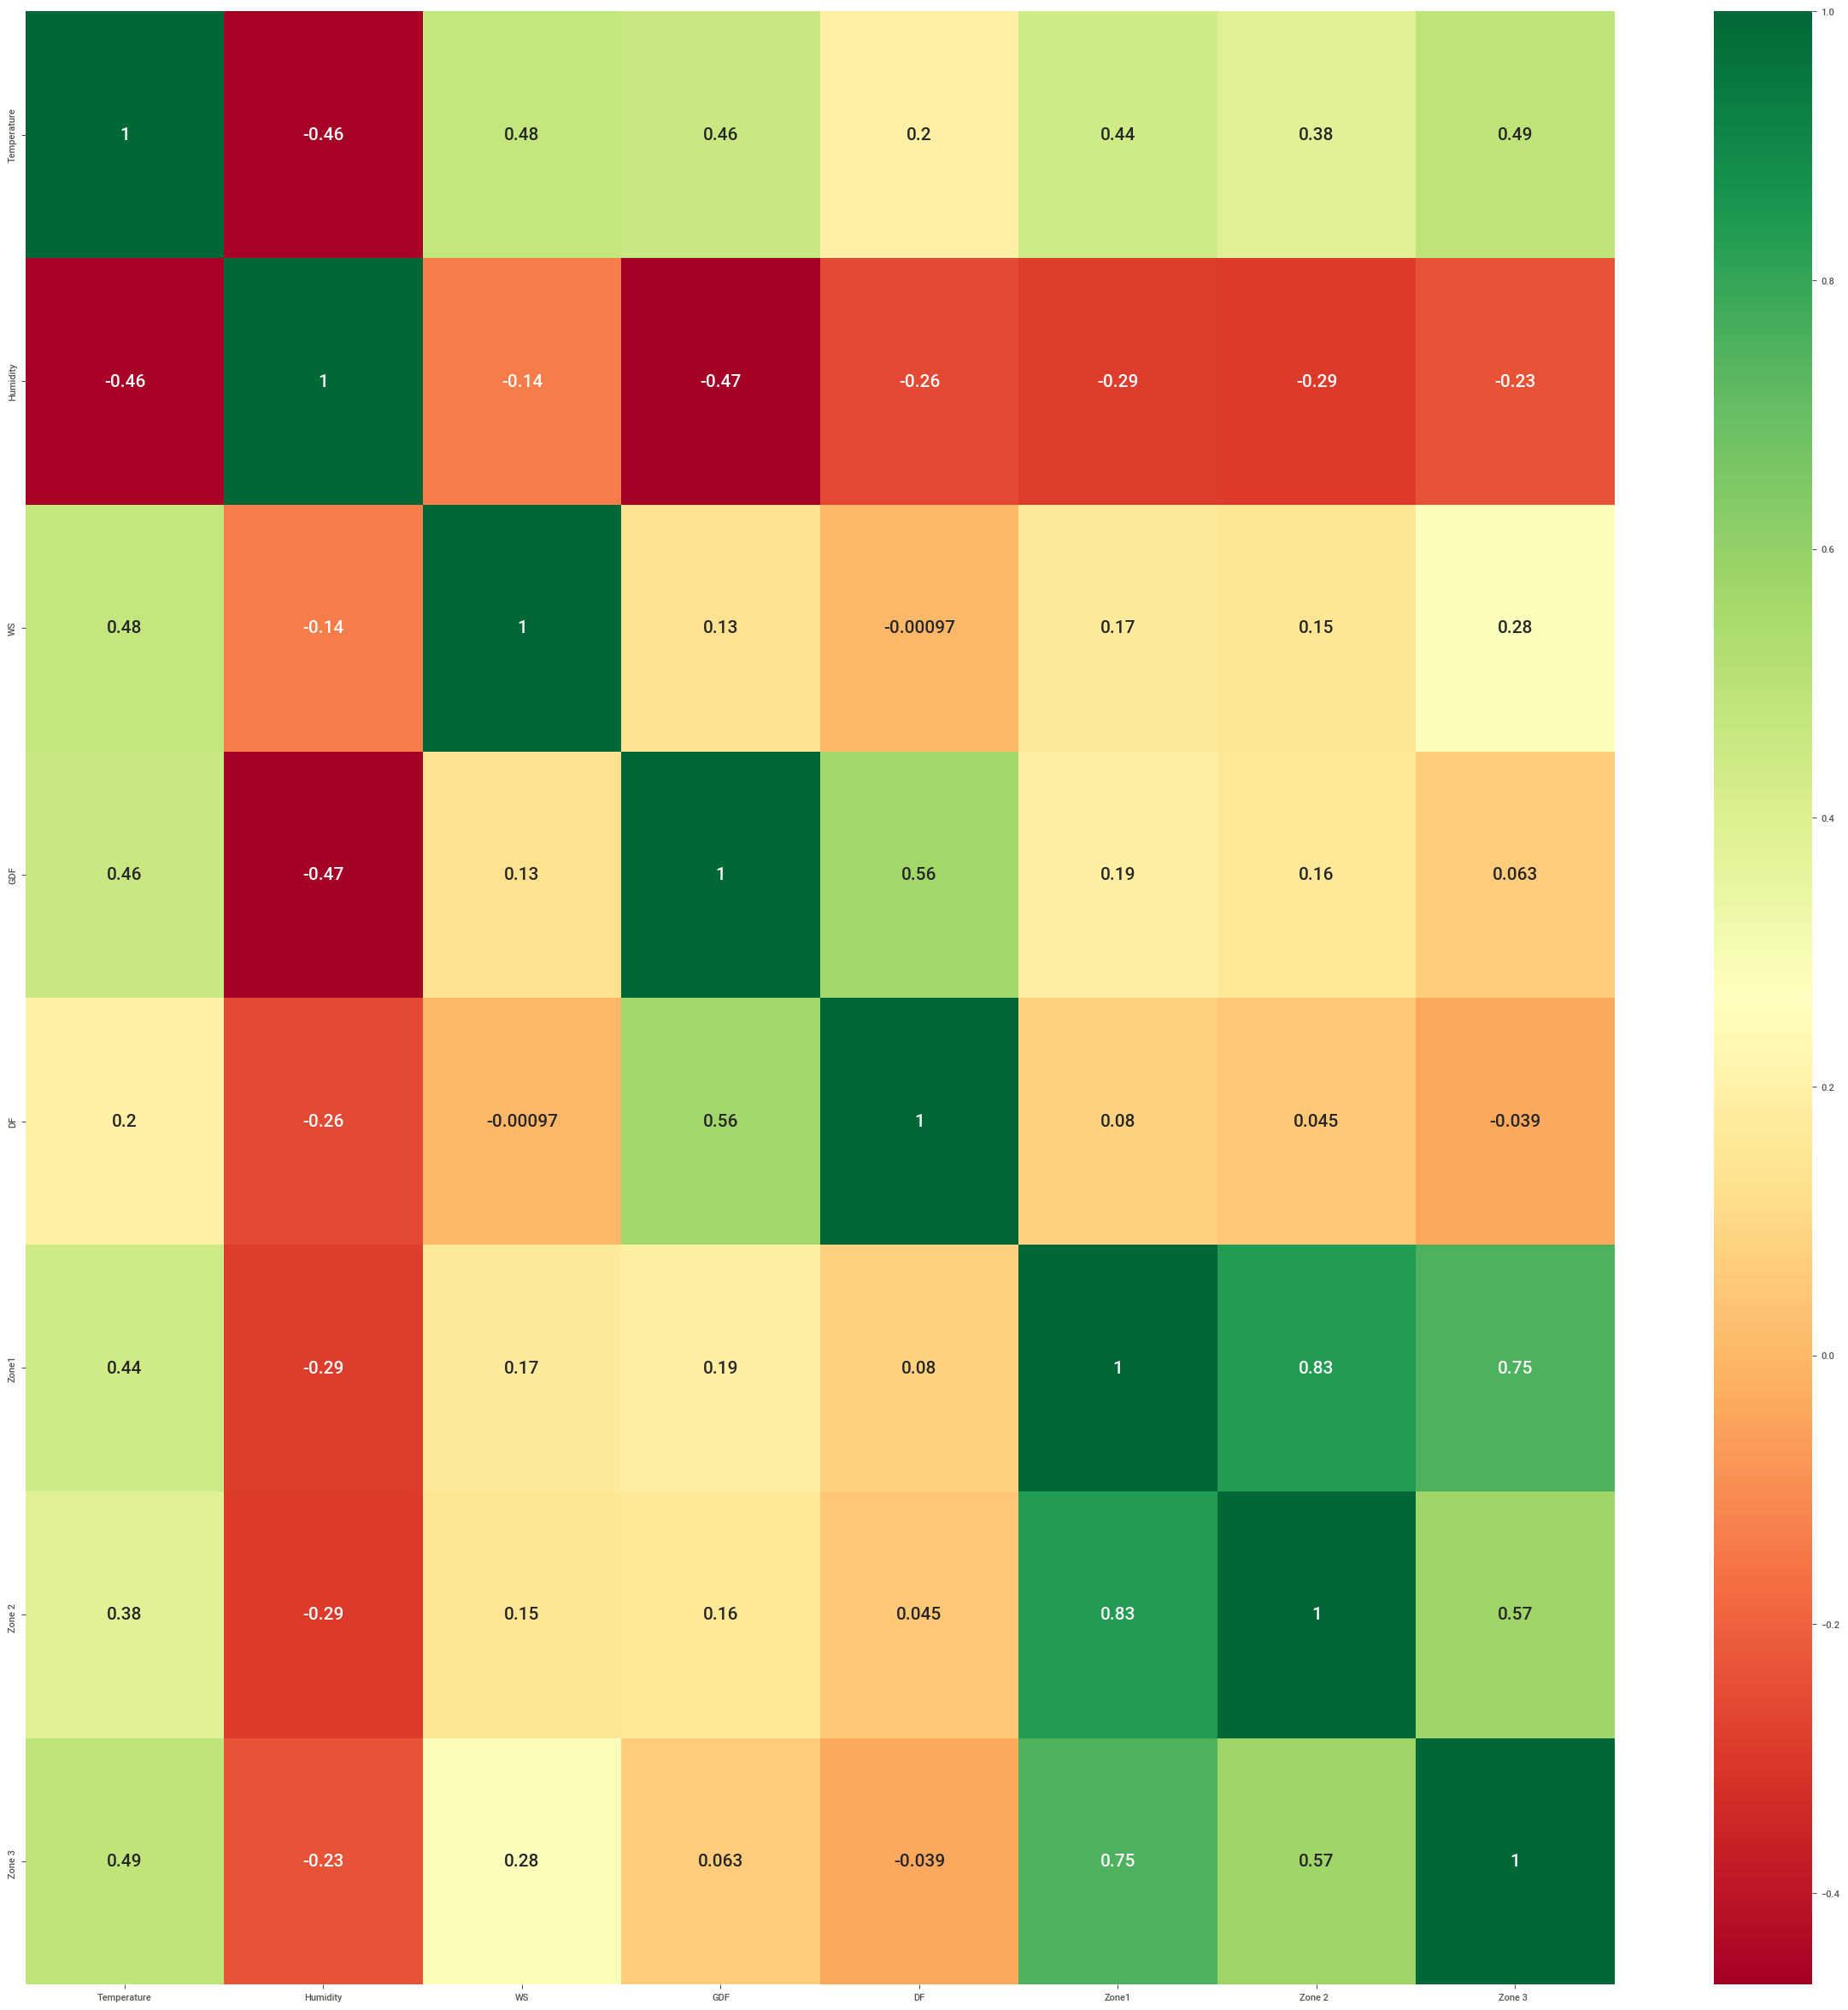

In [21]:
## Checking correlation

plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

In [22]:
df['Temperature'] = df['Temperature'].astype(int)
df['Humidity'] = df['Humidity'].astype(int)
df['WS'] = df['WS'].astype(int)
df['GDF'] = df['GDF'].astype(int)
df['DF'] = df['DF'].astype(int)
df['Zone1'] = df['Zone1'].astype(int)
df
 

,Temperature,Humidity,WS,GDF,DF,Zone1,Zone 2,Zone 3
0,6,73,0,0,0,34055,16128.87538,20240.96386
1,6,74,0,0,0,29814,19375.07599,20131.08434
2,6,74,0,0,0,29128,19006.68693,19668.43373
3,6,75,0,0,0,28228,18361.09422,18899.27711
4,5,75,0,0,0,27335,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...
52411,7,72,0,0,0,31160,26857.31820,14780.31212
52412,6,72,0,0,0,30430,26124.57809,14428.81152
52413,6,72,0,0,0,29590,25277.69254,13806.48259
52414,6,73,0,0,0,28958,24692.23688,13512.60504


In [23]:
df

,Temperature,Humidity,WS,GDF,DF,Zone1,Zone 2,Zone 3
0,6,73,0,0,0,34055,16128.87538,20240.96386
1,6,74,0,0,0,29814,19375.07599,20131.08434
2,6,74,0,0,0,29128,19006.68693,19668.43373
3,6,75,0,0,0,28228,18361.09422,18899.27711
4,5,75,0,0,0,27335,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...
52411,7,72,0,0,0,31160,26857.31820,14780.31212
52412,6,72,0,0,0,30430,26124.57809,14428.81152
52413,6,72,0,0,0,29590,25277.69254,13806.48259
52414,6,73,0,0,0,28958,24692.23688,13512.60504


# Model Building

In [24]:
# Split x and y 
x=df.drop('Zone1',axis=1)
y=df.Zone1

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

# Linear Regression 

In [26]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

y_pred = linear_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


Mean Squared Error: 9286095.195377968
R-squared (R2) score: 0.8182205180547424


# KNN Regressor

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(x_train, y_train)

y_pred = knn_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) score:", r2)


Mean Squared Error: 4583120.132428617
R-squared (R2) score: 0.910283366061073
